In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import keras

# Data Preparation

In [17]:
# Set standard image size for model
img_height, img_width = (224,224)
batch_size = 32

# Directories for image data
train_data_dir = "star_wars_images_processed/train"
valid_data_dir = "star_wars_images_processed/val"
test_data_dir = "star_wars_images_processed/test"


In [18]:
# Prepare images through preprocessing and augmentation steps
# Shear, zoom and flip steps account for overfitting
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

# Apply to training images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  
# Apply to validation images
valid_generator = train_datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  



Found 1674 images belonging to 50 classes.
Found 341 images belonging to 50 classes.


In [19]:
# Apply to testing images
test_generator = train_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation')  

Found 368 images belonging to 50 classes.


In [20]:
# Obtain class names
class_names = list(train_generator.class_indices.keys())
class_names

['Admiral Ackbar',
 'Admiral Piett',
 'Anakin Skywalker',
 'BB-8',
 'Bail Organa',
 'Bib Fortuna',
 'Boba Fett',
 'Bodhi Rook',
 'C-3PO',
 'Captain Phasma',
 'Cassian Andor',
 'Chewbacca',
 'Dark Sidious',
 'Darth Maul',
 'Darth Vader',
 'Finn (FN-2187)',
 'General Grievous',
 'General Hux',
 'Grand Moff Tarkin',
 'Greedo',
 'Han Solo',
 'Jabba the Hutt',
 'Jango Fett',
 'Jar Jar Binks',
 'Jyn Erso',
 'K-2SO',
 'Kenobi',
 'Kylo Ren',
 'Lando Calrissian',
 'Luke Skywalker',
 'Mace Windu',
 'Maz Kanata',
 'Nien Nunb',
 'Obi-Wan',
 'Orson Krennic',
 'Padm├⌐ Amidala',
 'Poe Dameron',
 'Princess Leia Organa',
 "Qi'ra",
 'Qui-Gon Jinn',
 'R2-D2',
 'Rose Tico',
 'Saw Gerrera',
 'Supreme Leader Snoke',
 'Tobias Beckett',
 'Vice-Admiral Holdo',
 'Watto',
 'Wedge Antilles',
 'Wicket W. Warrick',
 'Yoda']

# Model Training

In [21]:
# Initialise ResNet-50 model using imagenet weights
resnet_model = Sequential()

base_model = ResNet50(include_top=False, weights='imagenet',pooling= "avg",classes = "50",input_shape=(224,224,3))

# Preserve pretrained features
for layer in base_model.layers:
    layer.trainable = False

# Add layers to the model
resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(50, activation='softmax'))


In [22]:
#Compile model 
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# Fit the model over 10 epochs storing it in history for plotting later
epochs=10
history = resnet_model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/10


c:\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2015 - loss: 3.4940 - val_accuracy: 0.5191 - val_loss: 1.6982
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6923 - loss: 1.1294 - val_accuracy: 0.6628 - val_loss: 1.2086
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8157 - loss: 0.6257 - val_accuracy: 0.7390 - val_loss: 1.0192
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9027 - loss: 0.4164 - val_accuracy: 0.7243 - val_loss: 1.0204
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9175 - loss: 0.2961 - val_accuracy: 0.7449 - val_loss: 0.9772
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9487 - loss: 0.1878 - val_accuracy: 0.7801 - val_loss: 0.8681
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9570 - loss: 0.1523 - val_accuracy: 0.8035 - val_loss: 0.7292
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9771 - loss: 0.0997 - val_accuracy: 0.7859 - val_loss: 0.7807
Epo

# Model Evaluation

In [26]:
# Summary of the model
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,811,928 (102.28 MB)

 Trainable params: 1,074,738 (4.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,149,478 (8.20 MB)

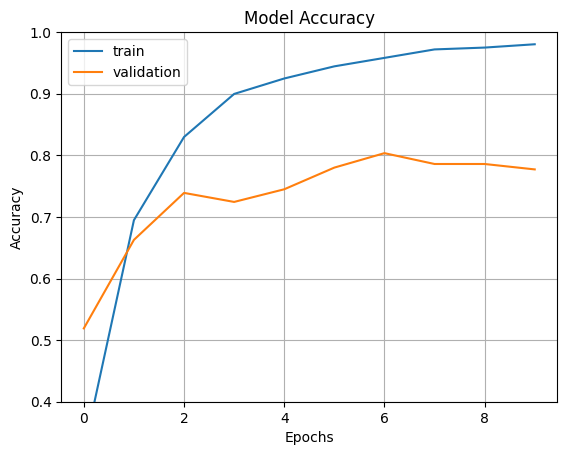

In [27]:
# Create plot for model accuracy
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

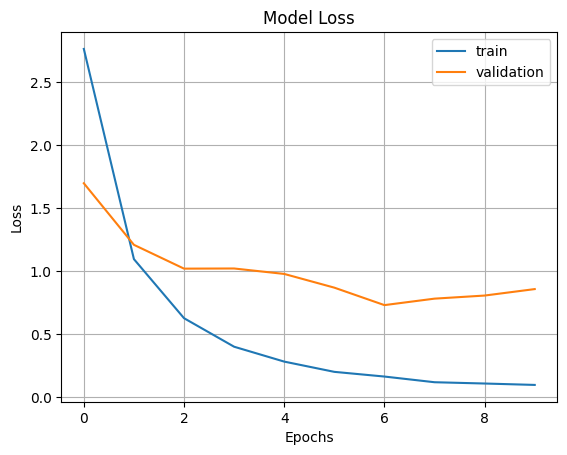

In [28]:
# Create plot for model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [79]:
# Save model
resnet_model.save('resnet50_starwars.keras')

In [29]:
# Test the models accuracy on the training data
test_loss, test_acc = resnet_model.evaluate(test_generator,verbose=2)
print('\nTest accuracy:', test_acc)

368/368 - 15s - 39ms/step - accuracy: 0.7717 - loss: 0.9096

Test accuracy: 0.77173912525177


# Model Prediction

In [46]:
# Use cv2 to load images for model prediction resizing to standard model size
image=cv2.imread("vader3.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [54]:
# Use model to predict class obtaining prediction with highest likelihood
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted class is Darth Vader


array([[1.25918504e-07, 1.01606194e-04, 1.50790925e-06, 1.14800001e-03,
        1.17390007e-01, 1.53357291e-03, 4.37092211e-08, 3.26986104e-04,
        1.86716261e-05, 5.91889557e-06, 1.48121069e-06, 5.11324324e-04,
        1.79053217e-01, 6.14491864e-06, 5.39824128e-01, 1.19860106e-05,
        4.44911529e-05, 1.40899315e-01, 1.37039768e-02, 3.26974259e-05,
        9.80628101e-06, 2.99179814e-09, 8.31985645e-08, 6.95683795e-08,
        2.29851912e-06, 5.96736900e-05, 1.60240397e-05, 3.35142831e-05,
        1.49685388e-06, 8.76564343e-07, 7.89671674e-07, 1.02668828e-05,
        2.46633226e-06, 7.20136768e-06, 4.87123569e-03, 1.46726365e-04,
        9.66878844e-08, 7.39508505e-06, 5.81784661e-06, 2.57205011e-06,
        9.15954672e-07, 1.16848049e-07, 9.89625460e-06, 2.30151018e-05,
        2.44923740e-05, 8.19553316e-06, 3.52044907e-07, 8.86365615e-06,
        1.28217565e-04, 2.32233106e-06]], dtype=float32)